In [5]:
import pandas as pd
import numpy as np
import string
from matplotlib import pyplot as plt
import re
df=pd.read_csv("Data_Cleaning_Final_Output.csv")

def clean(col):
    for i in range(0,len(df.index)):
        if col[i]=="[]":
            col[i]=""
df.apply(clean,axis=0)
df.head()

,Unnamed: 0,Index,Scientific,Synonym,English,Dutch,Spanish,French,German,Italian,...,family,order,crop_categories,Count of Crop Categories,proverbs,recipies,"Count of Annual, biennial, or perennial",Count of Climate and weather,Count of Pollination,Count of Evergreen or Deciduous
0,0,0,['Abelmoschus caillei'],,West African okra,NaN,NaN,Gombo ouest-africain,NaN,NaN,...,Malvaceae,Malvales,"Vegetables,Fruit vegetables,Food crops,Tropica...",4,NaN,NaN,0,0,0,0
1,1,1,['Abelmoschus esculentus'],['Hibiscus esculentus'],"Ladies fingers,Lady fingers,Lady’s fingers,Okra",Okra,"Gombo,Ocra,Quimbombo","Gombo,Okra",Okra,"Abelmosco,Gombo",...,Malvaceae,Malvales,"Vegetables,Fruit vegetables,Podded vegetables,...",5,You can’t eat okra with just one fingerAn okra...,Lady fingers recipeRinse pods. Slice off the t...,2,2,1,0
2,2,2,['Acacia mearnsii'],,Black wattle,NaN,NaN,Acacia noir,NaN,NaN,...,Fabaceae,Fabales,"Subtropical crops,Temperate crops",2,NaN,NaN,0,0,0,0
3,3,3,['Acacia senegal'],,"Gum acacia,Gum arabic,Gum arabic tree,Gum sene...",Arabische gom,Goma arábiga,"Gomme arabique,Gommier blanc","Gummi arabicum,Gummiarabikum,Verek-Akazie",Gomma arabica,...,Fabaceae,Fabales,"Medicinal plants,Tropical crops",2,NaN,NaN,0,0,0,0
4,4,4,['Acacia seyal'],,"Red acacia,Shittah tree",Arabische gom,Goma arábiga,NaN,"Gummi arabicum,Gummiarabikum,Seyal-Akazie",Gomma arabica,...,Fabaceae,Fabales,"Medicinal plants,Aphrodisiacs,Tropical crops",3,NaN,NaN,0,0,0,0


<AxesSubplot:xlabel='genus'>

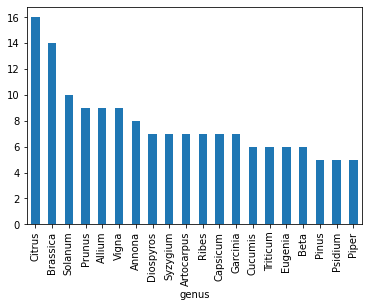

In [6]:
#Genus analysis
x = df.groupby('genus').count()
y=x.sort_values(['Index'],ascending=False)
y['Index'].head(20).plot(kind='bar')

#We can see the top 20 genus categories in the scraped data below - Citrus being one of the most widely grown and consumed class of fruits in the world tops the list. This is followed by Brassica (cruciferous vegetables) and Solanum, which consists of food crops of great importance.

<AxesSubplot:xlabel='family'>

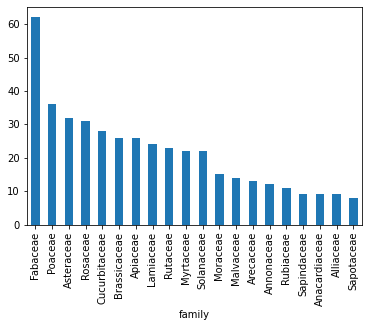

In [7]:
#Family analysis
x = df.groupby('family').count()
y=x.sort_values(['Index'],ascending=False)
y['Index'].head(20).plot(kind='bar')

#We can see the top 20 family categories in the scraped data below. Fabaceae is the top category, which contains several important agricultural products such as beans, pea, soybean, and peanuts. Poaceae is the second-largest and comprises the majority of cereal crops. 

<AxesSubplot:xlabel='order'>

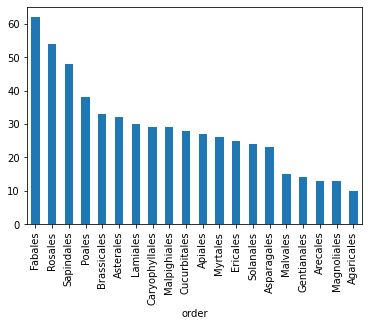

In [8]:
#Order analysis
x = df.groupby('order').count()
y=x.sort_values(['Index'],ascending=False)
y['Index'].head(20).plot(kind='bar')

#We can see the top 20 orders in the scraped data below-Fabales are the most important family of food plants; Rosales, consists of several economically important fruit;Sapindales, consists of many well-known citrus fruits. 

In [9]:
#Pollination analysis: Distribution of crops by the number of pollination methods
x1 = df[df['Count of Pollination']>0]
x = x1.groupby('Count of Pollination').count()
y=x.sort_values(['Count of Pollination'],ascending=True)
y['Index'].head(4)

#We can see that while most crops have only one type of pollination, several crops have 2 types of pollination methods

Count of Pollination
1    51
2    25
3     2
Name: Index, dtype: int64

In [10]:
#Climate and weather

x1 = df[df['Count of Climate and weather']>0]
x = x1.groupby('Count of Climate and weather').count()
y=x.sort_values(['Count of Climate and weather'],ascending=True)
y['Index'].head(4)


#The majority of the crops grow only in one type of climate. This makes sense because crop species are highly dependent on the weather patterns of their area of origin.

Count of Climate and weather
1    107
2     19
3     19
4     11
Name: Index, dtype: int64

(array([ 24.,  83., 247., 224.,  45.,  11.,  12.,   3.,   0.,   0.,   1.]),
 array([ 0.        ,  1.27272727,  2.54545455,  3.81818182,  5.09090909,
         6.36363636,  7.63636364,  8.90909091, 10.18181818, 11.45454545,
        12.72727273, 14.        ]),
 <BarContainer object of 11 artists>)

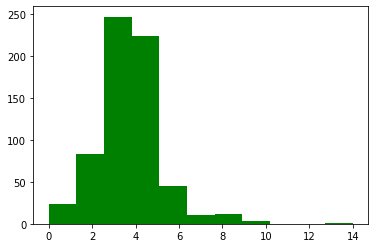

In [11]:
#Which crops belong to the most number of categories, that is, have diverse uses?

plt.hist(df['Count of Crop Categories'], bins = 11,color='g')

#Almost all crops belong to multiple categories, and most crops belong to 3 or 4 categories. This might be related to the fact that world crop databases would tend to index crops which have multiple uses, are very widespread, and are of great importance to the general population. 

In [12]:
#Analysis of names
#On average, which language contains the most names for crops

name_mean = pd.DataFrame([df['Count English'].mean(),df['Count Dutch'].mean(),df['Count Spanish'].mean(),df['Count French'].mean(),df['Count German'].mean()])
name_mean.index = ['English','Dutch','Spanish','French','German']
name_mean

#On average, the English language contains the most variants of names for crops 

,0
English,3.152308
Dutch,1.510769
Spanish,1.510769
French,1.526154
German,1.989231


Text(0, 0.5, 'Number of crops')

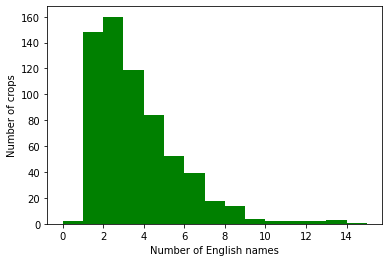

In [13]:
#Distribution of crops by number of English names

plt.hist(df['Count English'], bins = 15,color='g')
plt.xlabel('Number of English names')
plt.ylabel('Number of crops')

#Most crops have between 1 to 5 names

In [14]:
#Annual, biennial, or perennial

x1 = df[df['Count of Annual, biennial, or perennial']>0]
x = x1.groupby('Count of Annual, biennial, or perennial').count()
y=x.sort_values(['Count of Annual, biennial, or perennial'],ascending=True)
y['Index']

#Most of the crops have only type of cropping pattern reported. This makes sense because an annual or biennial crop cannot be perinial as well.

Count of Annual, biennial, or perennial
1    71
2    19
Name: Index, dtype: int64